<a href="https://colab.research.google.com/github/manish2509/Sparks-Intern/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task - 2**

**Author :** S.Manishma

**Problem : To predict the optimum number of clusters
and represent it visually.** 

In [ ]:
#Imporing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree


In [ ]:
#Iris Dataset
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
if(iris_data.isnull==True):
  print("There is null data")
else:
  print("There is no null data")

There is no null data


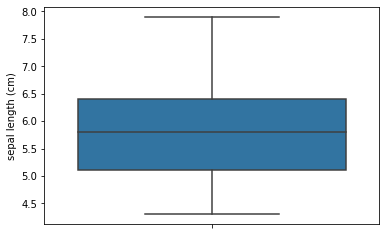

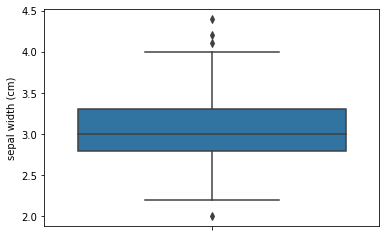

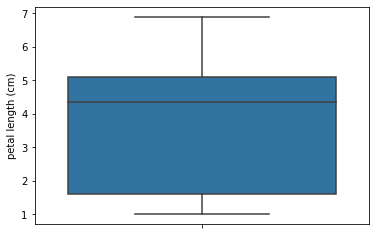

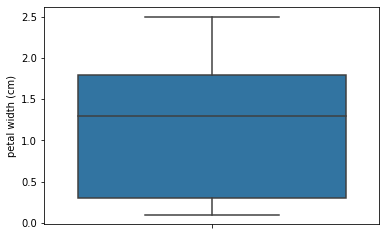

In [ ]:
#To find the outliers
cols = iris_data.columns
for i in cols:
    sns.boxplot(y=iris_data[i])
    plt.show()

From the above boxplot we can say that there are outliers in the column 'sepal width (cm)'

In [ ]:
# To remove outliers from 'sepal width (cm)'
q1 = iris_data['sepal width (cm)'].quantile(0.25)
q3 = iris_data['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
iris_data = iris_data[(iris_data['sepal width (cm)'] >= q1-1.5*iqr) & (iris_data['sepal width (cm)'] <= q3+1.5*iqr)]

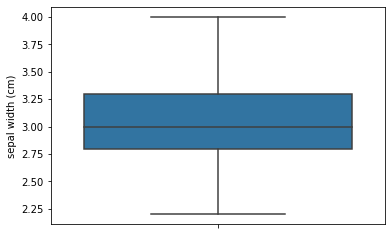

In [ ]:
# Blocplot for sepal width (cm) after outlier treatment
sns.boxplot(y=iris_data['sepal width (cm)'])
plt.show()

In [ ]:
# Standardizing to avoid bias
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(iris_data)

In [ ]:
x = iris_data.iloc[:, [0, 1, 2, 3]].values

In [ ]:
#Finding the optimum no:of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

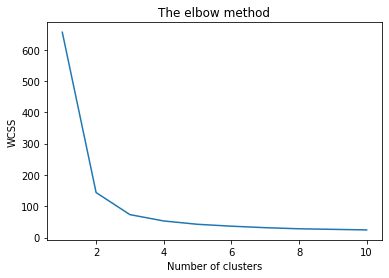

In [ ]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

From the above elbow curve we can say that '3' is the optimal number of cluster


In [ ]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

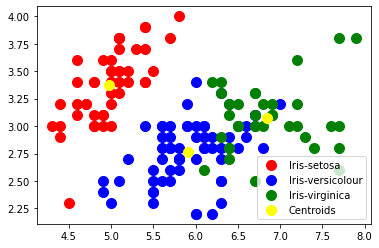

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()